In this notebook, we will read and display color image nrrd file

In [1]:
import os.path as path
import sys
sys.path.insert(0, path.abspath('../'))
import nrrd_handler
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we download the nrrd file. Downloading the file could take some time. <br> You can also manually download the file in http://teem.sourceforge.net/nrrd/files/foolc.nrrd

In [2]:
file_path = './foolc.nrrd'

In [3]:
if not path.exists(file_path):
    urllib.request.urlretrieve("http://teem.sourceforge.net/nrrd/files/foolc.nrrd", file_path)

Initialize the file path

In [4]:
nH = nrrd_handler.NrrdHandler(file_path)

Decode the file using pynrrd library and SimpleITK library

In [5]:
img_pynrrd = nH.read_by_pynrrd()
img_sitk = nH.read_by_sitk()

Let's check the shape of the image from pynrrd

In [6]:
print(img_pynrrd.shape)

(3, 128, 128)


In order to visualize the color image, the first dimension must be the third dimension. Therefor, let's reshape it.

In [7]:
img_pynrrd_restacked = np.stack([img_pynrrd[ind, :, :] for ind in range(img_pynrrd.shape[0])], axis=2)

pynrrd library

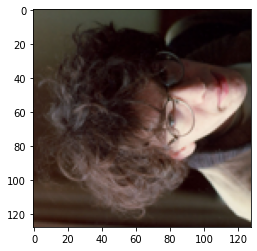

In [8]:
plt.imshow(img_pynrrd_restacked)

SimpleITK

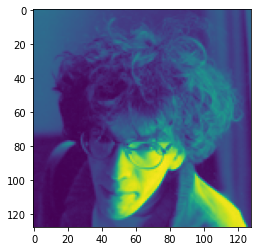

In [7]:
plt.imshow(img_sitk)